# Ejercicio 1: OR

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ds_train = np.genfromtxt('icgtp1datos/OR_trn.csv', delimiter=',')
ds_train_size = ds_train.shape[0]

ds_test = np.genfromtxt('icgtp1datos/OR_tst.csv', delimiter=',')
ds_test_size = ds_test.shape[0]


In [41]:
def perceptron_simple(ds_train,N,nu,gamma,N_valid):
    # ds_test=np.concatenate([-np.ones(ds_test.shape[0]), ds_test])
    # ds_train=np.concatenate([-np.ones(ds_train.shape[0]), ds_train])
    w = np.random.rand(ds_train.shape[1]) - 0.5
    for i in range(N):
        for k, j in enumerate(ds_train):
            j = np.concatenate([[-1], j])
            # Convolución
            y = np.dot(j[0:len(j)-1],w)
            # No linealidad
            if (y > 0):
                y = 1
            else:
                y = -1
            # Actualización de pesos
            if (y > 0 and 1 != j[len(j)-1]):
                errores += 1
            elif (y <= 0 and -1 != j[len(j)-1]):
                errores += 1
            w = w + j[0:len(j)-1] * gamma * (j[len(j)-1] - y)


        errores = 0
        for j in ds_train[np.random.randint(0, ds_train.shape[0], size=N_valid)]:
            j = np.concatenate([[-1], j])
            # Convolución
            y = np.dot(j[0:len(j)-1],w)
            
            # No linealidad
            if (y > 0 and 1 != j[len(j)-1]):
                errores += 1
            elif (y <= 0 and -1 != j[len(j)-1]):
                errores += 1
        error = (errores/200)
        #print(f'Epoca {i}: error = {error}')
        if (error < nu):
            return w
    return w

In [4]:
def perceptron_test(ds_test,w):
    errores = 0
    for j in ds_test:
        j = np.concatenate([[-1], j])
        # Convolución
        y = np.dot(j[0:len(j)-1],w)
        # No linealidad
        if (y > 0 and 1 != j[len(j)-1]):
            errores += 1
        elif (y <= 0 and -1 != j[len(j)-1]):
            errores += 1
    return (errores/ds_test.shape[0])


In [42]:
N = 10 # Epocas
gamma = 0.0001 # Tasa de aprendizaje
nu = 0.005 # Umbral de error
N_valid=200
w, errores_evol = perceptron_simple(ds_train,N,nu,gamma,N_valid)
print(w)
error = perceptron_test(ds_test,w)

Epoca 0: error = 0.75
Epoca 1: error = 0.0
[-0.00105387  0.0099293   0.01011765]


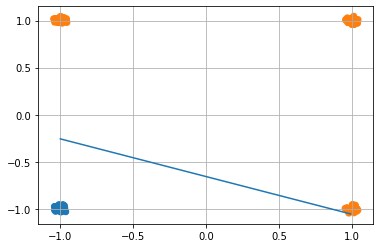

In [6]:
fig1 = plt.figure() 
x_x = ds_test[:,0]
x_y = ds_test[:,1]
x_color = np.where(x_x < 0, np.where(x_y < 0, 'C0', 'C1'), 'C1')
plt.grid()
plt.scatter(x_x, x_y, c = x_color)

x_recta = np.arange(-1, 1, 0.01)
recta = w[0]/w[2] - w[1]/w[2] * x_recta
plt.plot(x_recta, recta)

# Ejercicio 1: XOR

In [7]:
ds_train = np.genfromtxt('icgtp1datos/OR_trn.csv', delimiter=',')
ds_train_size = ds_train.shape[0]

ds_test = np.genfromtxt('icgtp1datos/OR_tst.csv', delimiter=',')
ds_test_size = ds_test.shape[0]

# Ejercicio 2

In [8]:
def generar_particiones(filename, n, p_test):
    ds = np.genfromtxt(filename, delimiter=',')
    n_test = int(ds.shape[0] * p_test)
    n_train = ds.shape[0] - n_test
    M_test = np.zeros((n,n_test),dtype = int)
    M_train = np.zeros((n, n_train),dtype = int)

    for i in range(n):
        idx = range(ds.shape[0])
        idx=np.random.choice(range(ds.shape[0]),ds.shape[0],replace = False)
        idx_test = idx[0:n_test]
        idx_train = idx[n_test:ds.shape[0]]
        M_test[i] = idx_test
        M_train[i] = idx_train
    
    return (ds, M_test, M_train)


a) El archivo spheres1d10.csv contiene una serie de datos generados a partir de los valores de la Tabla 1, con pequenas desviaciones aleatorias (< 10 %) en torno a ellos (Figura 2(a)). Realice con estos datos la validaci´on cruzada del perceptron simple con 5 particiones de entrenamiento y pruebacon relacion 80/20

In [9]:
num_particiones=5
ds, M_tst, M_trn = generar_particiones('icgtp1datos\spheres1d10.csv', num_particiones, 0.2)
ds_size = ds.shape[0]

w_particion=np.zeros((num_particiones,ds.shape[1]))

for i,particion in enumerate(M_trn):
    w_particion[i]= perceptron_simple(ds[particion],20,0.03,0.01,100)

errores=np.zeros(num_particiones)

for i,particion in enumerate(M_tst):
    errores[i]= perceptron_test(ds[particion],w_particion[i])

B) A partir de la misma tabla del ejemplo anterior, pero modificando el punto x = [−1 + 1 −1] → yd = 1, se ha generado un conjunto de datos diferente. Los archivosspheres2d10.csv, spheres2d50.csv y spheres2d70.csv contienen los datos con desviaciones aleatorias de 10, 50 y 70 % respectivamente (Figuras 2(b), 2(c) y 2(d)). Realice la validaci´on cruzada del perceptr´on simple con 10 particiones de entrenamiento y prueba, con relaci´on 80/20.


In [10]:
num_particiones=10
#particion de 10% de desvio
ds, M_tst, M_trn = generar_particiones('icgtp1datos\spheres2d10.csv', num_particiones, 0.2)
ds_size = ds.shape[0]

w_particion_2d10=np.zeros((num_particiones,ds.shape[1]))

for i,particion in enumerate(M_trn):
    w_particion_2d10[i]= perceptron_simple(ds[particion],20,0.03,0.01,100)

errores_2d10=np.zeros(num_particiones)

for i,particion in enumerate(M_tst):
    errores_2d10[i]= perceptron_test(ds[particion],w_particion_2d10[i])

#particion de 50% de desvio
ds, M_tst, M_trn = generar_particiones('icgtp1datos\spheres2d50.csv', num_particiones, 0.2)
ds_size = ds.shape[0]

w_particion_2d50=np.zeros((num_particiones,ds.shape[1]))

for i,particion in enumerate(M_trn):
    w_particion_2d50[i]= perceptron_simple(ds[particion],20,0.03,0.01,100)

errores_2d50=np.zeros(num_particiones)

for i,particion in enumerate(M_tst):
    errores_2d50[i]= perceptron_test(ds[particion],w_particion_2d50[i])

#particion de 70% de desvio
ds, M_tst, M_trn = generar_particiones('icgtp1datos\spheres2d70.csv', num_particiones, 0.2)
ds_size = ds.shape[0]

w_particion_2d70=np.zeros((num_particiones,ds.shape[1]))

for i,particion in enumerate(M_trn):
    w_particion_2d70[i]= perceptron_simple(ds[particion],20,0.03,0.01,100)

errores_2d70=np.zeros(num_particiones)

for i,particion in enumerate(M_tst):
    errores_2d70[i]= perceptron_test(ds[particion],w_particion_2d70[i])